In [2]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import requests
import plotly.express as px 
import folium

## 영화관

In [8]:
df_movie = pd.read_csv(glob('data/culture/*')[2])
df_movie.columns

Index(['도시', '1인당 평균소득', '지역경제규모', '총 스크린수', '일반상영관수', '특별상영관관수', 'THEA IDX'], dtype='object')

In [13]:
df_moive = df_movie[['도시', '일반상영관수', '특별상영관관수']]

In [14]:
df_movie

,도시,1인당 평균소득,지역경제규모,총 스크린수,일반상영관수,특별상영관관수,THEA IDX
0,강원도,21038,32366794696,131,135,41,2406.52
1,경기도,21937,297585276650,882,890,257,25803.54
2,경상남도,20650,68437878950,192,192,55,4945.05
3,경상북도,20667,54284128203,154,154,37,2796.59
4,광주광역시,22472,32395882392,136,142,39,3514.47
5,대구광역시,21046,50203380952,149,147,53,4256.37
6,대전광역시,22730,33009665230,108,109,36,4129.25
7,부산광역시,21352,71537313760,232,233,86,6635.91
8,서울특별시,25256,240170871248,608,614,249,21035.42
9,세종특별자치시,22061,8204375595,24,24,5,595.02


In [15]:
def categorize_address(df):
    # Copy the original DataFrame to avoid modifying it
    df_copy = df.copy()
    # Define a dictionary of city names and corresponding keywords
    city_dict = {
        "서울": ["서울특별시", "서울", "서울시"],
        "경기": ["경기도", "경기"],
        "대구": ["대구광역시", "대구시", "대구"],
        "부산": ["부산광역시", "부산", "부산시"],
        "대전": ["대전광역시", "대전", "대전시"],
        "인천": ["인천광역시", "인천시", "인천"],
        "경남": ["경상남도", "경남"],
        "경북": ["경상북도", "경북"],
        "충남": ["충청남도", "충남"],
        "강원": ["강원도", "강원"],
        "광주": ["광주광역시", "광주", "광주시"],
        "전북": ["전라북도", "전북"],
        "전남": ["전라남도", "전남"],
        "울산": ["울산광역시", "울산시", "울산"],
        "제주": ["제주특별시", "제주특별자치도", "제주시", "제주"],
        "충북": ["충청북도", "충북"],
        "세종": ["세종특별시","세종특별자치시", "세종"]
    }
    # Create a new column "도시" and initialize with an empty string
    df_copy["시도명"] = ""
    # Iterate over each city in the dictionary
    for city, keywords in city_dict.items():
        # Set the "도시" column to the corresponding city name if any of the keywords are found in the "주소" column
        df_copy.loc[df_copy["도시"].str.contains("|".join(keywords)), "시도명"] = city
    # Return the updated DataFrame
    return df_copy

In [264]:
df_movie_count = categorize_address(df_movie)[["시도명", '일반상영관수', '특별상영관관수']]
df_movie_count = df_movie_count.set_index('시도명')

## 공연

In [277]:
glob('data/culture/*')

['data/culture/미술관_요약.csv',
 'data/culture/박물관_전처리완료.csv',
 'data/culture/영화관_요약.csv',
 'data/culture/가동률.csv',
 'data/culture/공연수, 인구수.csv',
 'data/culture/공공도서관_통계데이터_제공.csv']

In [271]:
glob('data/culture/*')[3]

'data/culture/가동률.csv'

In [272]:
df_concert_op = pd.read_csv(glob('data/culture/*')[3])
df_concert_op = df_concert_op[['도시','시설명', '가동률']]

In [273]:
df_concert_op = df_concert_op.set_index("도시")

In [276]:
df_concert_op

,시설명,가동률
도시,,
강원,44,5.124533
경기,148,10.025916
경남,48,8.105023
경북,34,8.058018
광주,34,12.369057
대구,71,13.386070
대전,36,19.756469
부산,68,13.025786
서울,448,22.927471


In [278]:
df_concert_op1 = pd.read_csv(glob('data/culture/*')[4]).set_index('index')

In [279]:
df_concert_op1 = df_concert_op1[['공연수', "총인구", '1000명당 공연횟수']]

In [280]:
df_concert = df_concert_op.merge(df_concert_op1, left_index=True, right_index=True)

In [281]:
df_concert = df_concert[['시설명', '가동률', '공연수']]

In [282]:
df_concert

,시설명,가동률,공연수
강원,44,5.124533,413
경기,148,10.025916,2191
경남,48,8.105023,593
경북,34,8.058018,483
광주,34,12.369057,434
대구,71,13.386070,1065
대전,36,19.756469,611
부산,68,13.025786,997
서울,448,22.927471,7292
세종,10,32.164384,559


## 도서관

In [20]:
df_lib = pd.read_csv(glob('data/culture/*')[-1])

In [21]:
df_lib.head(2)

,번호,도서관명,구분,지역,시군구,설립주체,설립기관명,운영방식,운영기관명,분관내용,...,지식정보취약계층 관련 예산_노인(천원),지식정보취약계층 관련 예산_다문화(천원),어린이실 유무,어린이서비스이용자수,어린이자료수,어린이연간증가자료수,메타데이터 구축 건수_도서자료,메타데이터 구축 건수_연속간행물,메타데이터 구축 건수_비도서자료,메타데이터 구축 건수_기타
0,1,더불어 숲,공공(일반),대구,북구,사립,지역문화공간 더불어 숲,직영,지역문화공간 더불어 숲,본관,...,2100,0,유,630,24500,300,33700,360,1460,0
1,2,가람도서관,공공(일반),경기,파주시,지자체,파주시청,위탁,느티나무도서관재단,본관,...,0,0,유,63129,25762,1722,52678,111,9949,0


In [22]:
df_lib_count = pd.DataFrame(df_lib["지역"].value_counts())

In [23]:
df_lib_count.head(2)

,지역
경기,300
서울,195


In [25]:
df_lib_book_count = pd.DataFrame(df_lib.groupby("지역")["메타데이터 구축 건수_도서자료"].sum())
df_lib_book_count.head(2)

,메타데이터 구축 건수_도서자료
지역,
강원,3885692
경기,30535945


In [26]:
df_lib = df_lib_count.merge(df_lib_book_count, left_index=True, right_index=True)
df_lib.head(2)

,지역,메타데이터 구축 건수_도서자료
경기,300,30535945
서울,195,15057743


## 미술관

In [142]:
df_art = pd.read_csv(glob('data/culture/*')[0], encoding='cp949')

In [143]:
df_art = df_art.iloc[:,:14]

In [144]:
df_art

,ID,미술관,시도명,시설위도,시설경도,구분명,전시면적내용,면적내용,자료공간면적값,자료수,공연건수,총프로그램수,개관일수,관람인원수
0,KCDMART22N000000001,국립현대미술관(과천관),경기,37.431003,127.019930,국/공립,13788.200,3819.0,"1,172",49264,연4회,45(3관 전체),169,2
1,KCDMART22N000000002,국립현대미술관(서울관),서울,37.578628,126.980088,국/공립,10070.000,3078.0,"1,434",35368,연12회,45(3관 전체),157,937484
2,KCDMART22N000000003,국립현대미술관(덕수궁관),서울,37.566087,126.973726,국/공립,1152.000,275.0,NaN,NaN,연4회,45(3관 전체),149,329391
3,KCDMART22N000000004,국립현대미술관 미술품수장센터(청주관),충북,36.656196,127.492382,국/공립,3870.000,7384.0,72,4120,연3회,6,300,101793
4,KCDMART22N000000005,DDP디자인뮤지엄,서울,37.568045,127.010890,국/공립,1557.000,871.0,NaN,NaN,연8회,1,162,12431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,KCDMART22N000000288,제주옹기숨미술관,제주,33.449107,126.480635,사립,148.000,26.0,NaN,150,연2회,21,300,21000
288,KCDMART22N000000289,제주유리의성,제주,33.314634,126.273662,사립,15526.000,32.0,NaN,NaN,NaN,NaN,365,87352
289,KCDMART22N000000290,제주조각공원,제주,33.254130,126.322287,사립,214800.000,NaN,NaN,NaN,NaN,NaN,300,36000
290,KCDMART22N000000291,포도뮤지엄,제주,33.319268,126.385970,사립,1309.463,96.0,53,590,연1회,2,313,70000


In [145]:
df_art_count = pd.DataFrame(df_art["시도명"].value_counts())

In [146]:
df_art.loc[32,'자료수'] = 0

In [147]:
# 결측치에 0 대입
df_art['자료수'] = pd.to_numeric(df_art['자료수'], errors='coerce')

In [148]:
df_art["자료수"] = df_art["자료수"].fillna(0)

In [149]:
# 미술관 자료수 
df_art_file = df_art.groupby('시도명')["자료수"].sum()

In [150]:
df_art['관람인원수'] = pd.to_numeric(df_art['관람인원수'], errors='coerce')

In [151]:
# 관람인원수 
temp = df_art.groupby('시도명')['관람인원수'].sum()

In [152]:
df_art = df_art_count.reset_index()
df_art.columns =['도시','미술관수']
ratio = df_art[df_art['도시'] == '울산']['미술관수'] / sum(df_art[df_art['도시'] != '울산']['미술관수'])

In [153]:
ratio

15    0.003436
Name: 미술관수, dtype: float64

In [154]:
np.average(temp)

571406.3125

In [155]:
sum(temp) * ratio

15    31417.52921
Name: 미술관수, dtype: float64

In [156]:
temp

시도명
강원     678932.0
경기     994037.0
경남     136555.0
경북     410068.0
광주     168658.0
대구     234640.0
대전     103103.0
부산     637710.0
서울    3148198.0
울산          0.0
인천      44052.0
전남     572671.0
전북     289804.0
제주    1209995.0
충남     267248.0
충북     246830.0
Name: 관람인원수, dtype: float64

In [157]:
temp = temp.reset_index()

In [158]:
temp.loc[9,'관람인원수'] = sum(temp['관람인원수'])*ratio[15]

In [159]:
temp['관람인원수'] = temp['관람인원수']/1000

In [160]:
temp = temp.set_index('시도명')

In [161]:
df_art = df_art.set_index('도시')

In [162]:
df_art = df_art.merge(temp, left_index=True, right_index=True)

In [165]:
df_art = df_art.merge(df_art_file, left_index=True, right_index=True)

In [167]:
df_art.head(2)

,미술관수,관람인원수,자료수
경기,58,994.037,194107.0
서울,50,3148.198,328722.0


## 박물관 

In [210]:
df_museum = pd.read_csv(glob('data/culture/*')[1])

In [211]:
df_museum.loc[df_museum['시도명'] == '제주특별자치도', '시도명'] = '제주'

In [212]:
df_museum.loc[df_museum['소장유물수'].isnull(), '소장유물수'] = 0

In [213]:
df_museum

,시설명,시도명,시군구명,도로명주소명,시설경도,시설위도,구분명,개관일자,총면적값,소장유물수,관람인원수,계약직원수
0,국립중앙박물관,서울,용산구,서울 용산구 서빙고로 137,126.977740,37.524702,국립,1945.12.03,"138,156","413,137","1,262,562",278
1,국립민속박물관,서울,종로구,서울 종로구 삼청로 37,126.978764,37.579485,국립,1946.04.25,"20,049","169,873","401,064",109
2,"국립민속박물관 파주,(개방형 수장고 및 정보센터)",경기,파주시,경기 파주시 탄현면 헤이리로 30,126.693918,37.786670,국립,2021.07.23,"10,268",0,"29,479",0
3,대한민국역사박물관,서울,종로구,서울 종로구 세종대로 198,126.978339,37.573714,국립,2012.12.26,"11,117","155,248","91,296",62
4,국립한글박물관,서울,용산구,서울 용산구 서빙고로 139,126.980486,37.521069,국립,2014.10.09,"11,767","81,315","110,074",60
...,...,...,...,...,...,...,...,...,...,...,...,...
830,토이파크뮤지엄,제주,서귀포시,제주특별자치도 서귀포시 안덕면 동광로 267-7,126.345363,33.318960,사립,2011.06.14,"1,077","2,650","25,000",0
831,피규어 뮤지엄제주,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 243,126.355357,33.281904,사립,2017.09.28,"1,694","3,150","105,000",0
832,한림공원,제주,제주시,제주특별자치도 제주시 한림읍 한림로 300,126.239691,33.390225,사립,1986.07.01,"4,397","100,000","268,649",0
833,헬로키티아일랜드,제주,서귀포시,제주특별자치도 서귀포시 안덕면 한창로 340,126.352081,33.290100,사립,2014.01.01,"3,756",190,"106,622",0


In [214]:
df_museum['관람인원수'] = df_museum['관람인원수'].str.replace(',', '')
df_museum['관람인원수'] = df_museum['관람인원수'].astype(int)

In [215]:
df_museum_count = pd.DataFrame(df_museum.groupby('시도명')['관람인원수'].sum())

In [216]:
temp1 = pd.DataFrame(df_museum['시도명'].value_counts())

In [217]:
df_museum_count = df_museum_count.merge(temp1, left_index=True, right_index=True)

In [218]:
df_museum_count

,관람인원수,시도명
강원,3702902,92
경기,3694684,120
경남,3434156,72
경북,2522221,69
광주,383520,12
대구,569979,16
대전,96431,14
부산,504487,29
서울,5935756,114
세종,186027,6


In [219]:
df_museum['소장유물수'] = df_museum['소장유물수'].str.replace(',', '')
df_museum['소장유물수'] = pd.to_numeric(df_museum['소장유물수'], errors='coerce')

In [220]:
df_museum['소장유물수'] = df_museum['소장유물수'].fillna(0)

In [222]:
temp2 = pd.DataFrame(df_museum.groupby('시도명')['소장유물수'].sum())

In [225]:
df_museum_count = df_museum_count.merge(temp2, left_index=True, right_index=True)

## 지역별 평균소득

In [230]:
df_income = pd.read_csv(glob('data/*.csv')[3], encoding='cp949')

In [231]:
df_income = df_income[~df_income["시도별"].isin(["시도별", "수도권", "비수도권", "전국"])]

In [234]:
df_income = df_income.set_index('시도별')

In [238]:
df_income.columns = ['경상소득']

In [239]:
df_income.head(2)

,경상소득
시도별,
서울,7103
인천,6293


## 지역별 문화예산 

In [243]:
df_budget = pd.read_csv(glob('data/*.csv')[2])

In [244]:
df_budget = df_budget.iloc[:17,:4]

In [246]:
df_budget.columns

Index(['Unnamed: 0', '문화예산(백만원) ', '문화예술예산(백만원)', '공연예술예산(백만원)'], dtype='object')

In [247]:
df_budget.columns = ['시도별', '문화예산(백만원) ', '문화예술예산(백만원)', '공연예술예산(백만원)']

In [249]:
df_budget = df_budget.set_index('시도별')

In [259]:
df_budget = df_budget.iloc[:,1]

In [261]:
df_budget = pd.DataFrame(df_budget)

In [297]:
df_budget['문화예술예산(백만원)'] = df_budget['문화예술예산(백만원)'].str.replace(',',"").astype(int)

In [299]:
df_budget

,문화예술예산(백만원)
시도별,
서울,928861
부산,381936
대구,213033
인천,255832
광주,279318
대전,160349
울산,124235
세종,48910
경기,1173350


In [310]:
df = pd.concat([df_movie_count,df_concert,df_lib,df_museum_count,df_income], axis=1)

In [311]:
df

,일반상영관수,특별상영관관수,시설명,가동률,공연수,지역,메타데이터 구축 건수_도서자료,관람인원수,시도명,소장유물수,경상소득
강원,135,41,44,5.124533,413,60,3885692,3702902,92,512227.0,5459
경기,890,257,148,10.025916,2191,300,30535945,3694684,120,913375.0,7123
경남,192,55,48,8.105023,593,76,6359362,3434156,72,846258.0,5460
경북,154,37,34,8.058018,483,70,6272480,2522221,69,1015194.0,5606
광주,142,39,34,12.369057,434,24,2603286,383520,12,251013.0,6223
대구,147,53,71,13.386070,1065,44,4909154,569979,16,399053.0,5558
대전,109,36,36,19.756469,611,26,2347186,96431,14,496651.0,6452
부산,233,86,68,13.025786,997,49,6057206,504487,29,340092.0,5679
서울,614,249,448,22.927471,7292,195,15057743,5935756,114,4538319.0,7103
세종,24,5,10,32.164384,559,13,580592,186027,6,21506.0,7751


In [312]:
df['경상소득'] = df['경상소득'].astype(int)

In [315]:
df = df.merge(df_budget, left_index=True, right_index=True)

In [316]:
df

,일반상영관수,특별상영관관수,시설명,가동률,공연수,지역,메타데이터 구축 건수_도서자료,관람인원수,시도명,소장유물수,경상소득,문화예술예산(백만원)
강원,135,41,44,5.124533,413,60,3885692,3702902,92,512227.0,5459,321058
경기,890,257,148,10.025916,2191,300,30535945,3694684,120,913375.0,7123,1173350
경남,192,55,48,8.105023,593,76,6359362,3434156,72,846258.0,5460,298887
광주,142,39,34,12.369057,434,24,2603286,383520,12,251013.0,6223,279318
대구,147,53,71,13.386070,1065,44,4909154,569979,16,399053.0,5558,213033
부산,233,86,68,13.025786,997,49,6057206,504487,29,340092.0,5679,381936
서울,614,249,448,22.927471,7292,195,15057743,5935756,114,4538319.0,7103,928861
세종,24,5,10,32.164384,559,13,580592,186027,6,21506.0,7751,48910
울산,59,26,16,12.208904,250,19,1967698,354765,10,155625.0,6739,124235
인천,177,56,48,7.323059,607,58,4718074,672530,30,217189.0,6293,255832


In [319]:
corr_matrix =df.corr()

<AxesSubplot:>

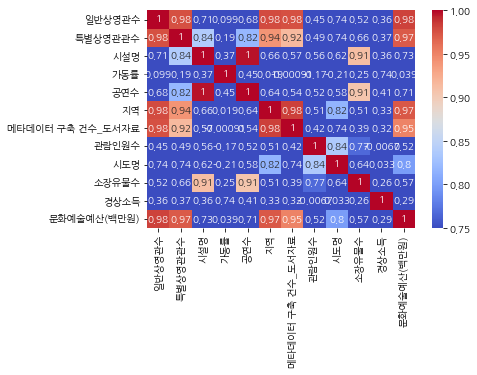

In [320]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0.75, vmax=1.0)

In [341]:
from scipy.stats import zscore


In [352]:
df_z = df.apply(zscore)

In [353]:
# 절대값 생성
df_z = df_z.abs()

In [354]:
df_z

,일반상영관수,특별상영관관수,시설명,가동률,공연수,지역,메타데이터 구축 건수_도서자료,관람인원수,시도명,소장유물수,경상소득,문화예술예산(백만원)
강원,0.346774,0.374245,0.25704,0.886667,0.368064,0.193194,0.364957,0.783943,1.187347,0.276461,1.121861,0.121377
경기,3.024225,2.519680,0.72576,0.200144,0.654463,3.087452,3.355218,0.779564,1.981433,0.099475,1.372941,2.798697
경남,0.092275,0.186676,0.21924,0.469198,0.264546,0.025516,0.019651,0.640734,0.620143,0.036576,1.120362,0.197338
광주,0.315520,0.401041,0.35154,0.128054,0.355987,0.685290,0.543971,0.984893,1.081469,0.521258,0.023589,0.264384
대구,0.293195,0.213472,0.00189,0.270504,0.006901,0.411903,0.222089,0.885533,0.968028,0.382523,0.973432,0.491486
부산,0.090786,0.228656,0.03024,0.220040,0.032206,0.343557,0.061830,0.920432,0.599346,0.437778,0.792020,0.087200
서울,1.791913,2.412498,3.56076,1.606943,3.588047,1.652170,1.194577,1.973790,1.811272,3.496595,1.342955,1.961043
세종,0.842378,0.856566,0.57834,2.900733,0.284099,0.835653,0.826324,1.090133,1.251630,0.736341,2.314488,1.053795
울산,0.686106,0.575212,0.52164,0.105622,0.461805,0.753637,0.632694,1.000216,1.138189,0.610651,0.797217,0.795721
인천,0.159248,0.173278,0.21924,0.578726,0.256494,0.220532,0.248762,0.830885,0.570985,0.552957,0.128538,0.344851


In [355]:
df_z["pekal index"] = df_z.sum(axis=1)/len(df_z.columns)

In [356]:
df_z.sort_values("pekal index", ascending=False)

,일반상영관수,특별상영관관수,시설명,가동률,공연수,지역,메타데이터 구축 건수_도서자료,관람인원수,시도명,소장유물수,경상소득,문화예술예산(백만원),pekal index
서울,1.791913,2.412498,3.56076,1.606943,3.588047,1.652170,1.194577,1.973790,1.811272,3.496595,1.342955,1.961043,2.199380
경기,3.024225,2.519680,0.72576,0.200144,0.654463,3.087452,3.355218,0.779564,1.981433,0.099475,1.372941,2.798697,1.716588
세종,0.842378,0.856566,0.57834,2.900733,0.284099,0.835653,0.826324,1.090133,1.251630,0.736341,2.314488,1.053795,1.130873
울산,0.686106,0.575212,0.52164,0.105622,0.461805,0.753637,0.632694,1.000216,1.138189,0.610651,0.797217,0.795721,0.673226
제주,0.766474,0.776179,0.47439,0.579297,0.489410,0.712629,0.630264,1.563243,0.166380,0.735408,0.029586,0.866803,0.649172
강원,0.346774,0.374245,0.25704,0.886667,0.368064,0.193194,0.364957,0.783943,1.187347,0.276461,1.121861,0.121377,0.523494
광주,0.315520,0.401041,0.35154,0.128054,0.355987,0.685290,0.543971,0.984893,1.081469,0.521258,0.023589,0.264384,0.471416
충북,0.386958,0.561815,0.46494,0.545657,0.500337,0.275210,0.362013,0.659538,0.287383,0.459107,0.177315,0.521670,0.433495
대구,0.293195,0.213472,0.00189,0.270504,0.006901,0.411903,0.222089,0.885533,0.968028,0.382523,0.973432,0.491486,0.426746
전남,0.480721,0.468030,0.44604,1.062406,0.452028,0.042831,0.112076,0.210173,0.279821,0.263552,0.702063,0.180307,0.391671


In [357]:
df_z['순위'] = df_z["pekal index"].rank(ascending=False)

In [358]:
df_z.sort_values('순위',ascending=True)

,일반상영관수,특별상영관관수,시설명,가동률,공연수,지역,메타데이터 구축 건수_도서자료,관람인원수,시도명,소장유물수,경상소득,문화예술예산(백만원),pekal index,순위
서울,1.791913,2.412498,3.56076,1.606943,3.588047,1.652170,1.194577,1.973790,1.811272,3.496595,1.342955,1.961043,2.199380,1.0
경기,3.024225,2.519680,0.72576,0.200144,0.654463,3.087452,3.355218,0.779564,1.981433,0.099475,1.372941,2.798697,1.716588,2.0
세종,0.842378,0.856566,0.57834,2.900733,0.284099,0.835653,0.826324,1.090133,1.251630,0.736341,2.314488,1.053795,1.130873,3.0
울산,0.686106,0.575212,0.52164,0.105622,0.461805,0.753637,0.632694,1.000216,1.138189,0.610651,0.797217,0.795721,0.673226,4.0
제주,0.766474,0.776179,0.47439,0.579297,0.489410,0.712629,0.630264,1.563243,0.166380,0.735408,0.029586,0.866803,0.649172,5.0
강원,0.346774,0.374245,0.25704,0.886667,0.368064,0.193194,0.364957,0.783943,1.187347,0.276461,1.121861,0.121377,0.523494,6.0
광주,0.315520,0.401041,0.35154,0.128054,0.355987,0.685290,0.543971,0.984893,1.081469,0.521258,0.023589,0.264384,0.471416,7.0
충북,0.386958,0.561815,0.46494,0.545657,0.500337,0.275210,0.362013,0.659538,0.287383,0.459107,0.177315,0.521670,0.433495,8.0
대구,0.293195,0.213472,0.00189,0.270504,0.006901,0.411903,0.222089,0.885533,0.968028,0.382523,0.973432,0.491486,0.426746,9.0
전남,0.480721,0.468030,0.44604,1.062406,0.452028,0.042831,0.112076,0.210173,0.279821,0.263552,0.702063,0.180307,0.391671,10.0
